# Ultimate Challange - logins Data Wrangling and EDA

**The Data Science Method**  

1.   Problem Identification 

2.   **Data Wrangling**
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis**
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Data Collection

In [1]:
#load common python packages
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x) #get rid of scientific notations
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import time
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import Image
%matplotlib inline

In [2]:
# switch folder
os.chdir('C:\\Users\\tc18f\\Desktop\\springboard\\ultimate_challenge')
os.getcwd()

'C:\\Users\\tc18f\\Desktop\\springboard\\ultimate_challenge'

In [3]:
# load the logins.json file
df = pd.read_json('logins.json')
df.head() # take a quick look

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

Frmo row index 2 and 3, we can see that the data might not be sorted by time. Let's sort it first.

In [4]:
# check df.info() to see the Dtype, we need it to be datetime to sort and round
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
# let's sort and round the time to 15 min intervals
df = df.sort_values('login_time')
df['login_time'] = df['login_time'].apply(lambda x: datetime.datetime(x.year, x.month, x.day, x.hour,15*(x.minute // 15)))
display(df.head())
display(df.tail())

login_time
6 1970-01-01 20:00:00
0 1970-01-01 20:00:00
1 1970-01-01 20:15:00
3 1970-01-01 20:15:00
2 1970-01-01 20:15:00

login_time
93136 1970-04-13 18:45:00
93137 1970-04-13 18:45:00
93139 1970-04-13 18:45:00
93141 1970-04-13 18:45:00
93140 1970-04-13 18:45:00

In [6]:
# let's add the Month, Day of Week (0~6 where 0 is Mon and 6 is Sun), and 24H_time as new columns for easier annalysis
df['Month'] = df.login_time.dt.month
df['DoW'] = df.login_time.dt.dayofweek
df['Hour'] = df.login_time.dt.hour
df['Count'] = 1 # use this column for groupby.count()['Count']
df.head()

login_time  Month  DoW  Hour  Count
6 1970-01-01 20:00:00      1    3    20      1
0 1970-01-01 20:00:00      1    3    20      1
1 1970-01-01 20:15:00      1    3    20      1
3 1970-01-01 20:15:00      1    3    20      1
2 1970-01-01 20:15:00      1    3    20      1

In [7]:
# get the counts of logins by column's value return a dataframe with row = input col_val, and column as count
def count_cal(df, col_name, col_2):
    count_list=[]
    col_name_list=[]
    col_2_list=[]
    if col_2:
        for i in list(df[col_name].unique()):
            for j in list(df[col_2].unique()):
                df_sub = df[(df[col_name]==i) & (df[col_2]==j)] # subset data frame
                count_list.append(len(df_sub))
                col_name_list.append(i)
                col_2_list.append(j)
        temp_df=pd.DataFrame({
            col_name: col_name_list,
            col_2: col_2_list,
            'Count':count_list})
        temp_sorted = temp_df.sort_values([col_name, col_2])
    else:
        for i in list(df[col_name].unique()):
            df_sub = df[df[col_name]==i] # subset data frame by unique vales in that column
            count_list.append(len(df_sub))
        temp_df=pd.DataFrame({
        col_name: df[col_name].unique(),
        'Count':count_list
        })
        temp_sorted = temp_df.sort_values(col_name)
    return temp_sorted

In [8]:
# get the counts by each column
df_logintime = count_cal(df, 'login_time', None)
df_Month = count_cal(df, 'Month', None)
df_DoW = count_cal(df, 'DoW', None)
df_Hour = count_cal(df, 'Hour', None)

In [9]:
df_DoW.head()

DoW  Count
4    0   8823
5    1   9268
6    2  10339
0    3  11960
1    4  15208

In [10]:
# get the counts by of combination of two columns
df_MonthDow = count_cal(df, 'Month', 'DoW')
df_MonthHour = count_cal(df, 'Month', 'Hour')
df_DowHour = count_cal(df, 'DoW', 'Hour')
df_DowHour.head()

DoW  Hour  Count
100    0     0    531
101    0     1    414
102    0     2    312
103    0     3    236
104    0     4    206

In [11]:
# change values for all dataframes used DoW 
DoW_list = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df['DoW'].replace([i for i in range(7)], DoW_list, inplace=True)
df_DoW['DoW'].replace([i for i in range(7)], DoW_list, inplace=True)
df_MonthDow['DoW'].replace([i for i in range(7)], DoW_list, inplace=True)
df_DowHour['DoW'].replace([i for i in range(7)], DoW_list, inplace=True)
df.head()

login_time  Month  DoW  Hour  Count
6 1970-01-01 20:00:00      1  Thu    20      1
0 1970-01-01 20:00:00      1  Thu    20      1
1 1970-01-01 20:15:00      1  Thu    20      1
3 1970-01-01 20:15:00      1  Thu    20      1
2 1970-01-01 20:15:00      1  Thu    20      1

Great, now we're ready for EDA

# EXPLORATORY ANALYSIS

In [14]:
# define a function to show values on bar plots
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height()) # change value format here
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

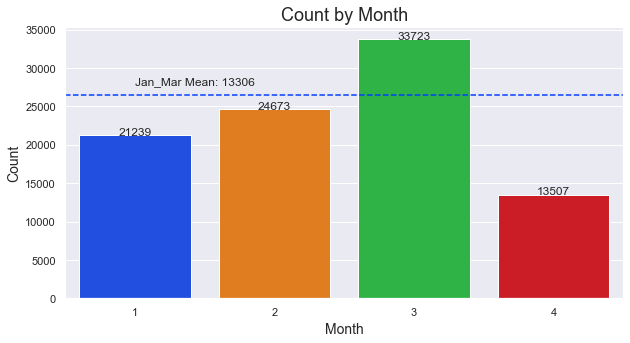

In [100]:
# Count by Month
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.set_palette('bright')
ax = sns.barplot(x="Month", y="Count", data=df_Month)
ax.axes.set_title("Count by Month",fontsize=18)
ax.set_xlabel("Month",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_Month[df_Month['Month'] < 4].mean()[1])
ax.axhline(df_mean, ls='--')
ax.text(0,df_mean*1.05, "Jan_Mar Mean: "+str(13306))
show_values_on_bars(ax)

April seems oddly short on count, let's take a look at the data.

In [12]:
df.tail() #the data only have up to april-13

login_time  Month  DoW  Hour  Count
93136 1970-04-13 18:45:00      4  Mon    18      1
93137 1970-04-13 18:45:00      4  Mon    18      1
93139 1970-04-13 18:45:00      4  Mon    18      1
93141 1970-04-13 18:45:00      4  Mon    18      1
93140 1970-04-13 18:45:00      4  Mon    18      1

std: 4304
No outliers


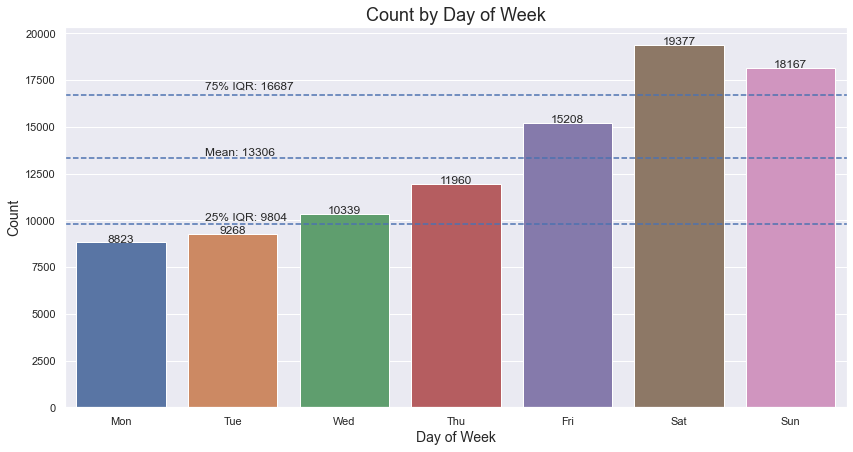

In [116]:
# Count fy Day of Week
fig, ax = plt.subplots(figsize=(14,7))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="DoW", y="Count", data=df_DoW)
ax.axes.set_title("Count by Day of Week",fontsize=18)
ax.set_xlabel("Day of Week",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_DoW['Count'].mean())
x = 0.75
std = 4304
IQRbot = 9804
IQRtop = 16687
ax.axhline(df_mean, ls='--')
ax.text(x,df_mean*1.01, "Mean: "+str(df_mean))
ax.axhline(IQRbot, ls='--') # 25%
ax.text(x,IQRbot*1.02, "25% IQR: "+str(IQRbot))
ax.axhline(IQRtop, ls='--') # 75%
ax.text(x,IQRtop*1.02, "75% IQR: "+str(IQRtop))
show_values_on_bars(ax)
print('std:', std)
print('No outliers')

std: 1803
No outliers


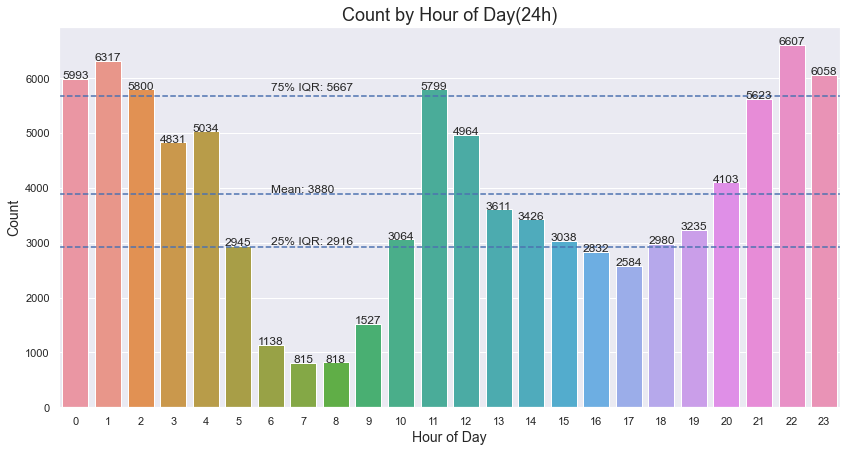

In [117]:
# Count by Hour of Day
fig, ax = plt.subplots(figsize=(14,7))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x='Hour', y='Count', data=df_Hour)
ax.axes.set_title("Count by Hour of Day(24h)",fontsize=18)
ax.set_xlabel("Hour of Day",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_Hour['Count'].mean())
x = 6
std = 1803
IQRbot = 2916
IQRtop = 5667
ax.axhline(df_mean, ls='--')
ax.text(x,df_mean*1.01, "Mean: "+str(df_mean))
ax.axhline(IQRbot, ls='--') # 25%
ax.text(x,IQRbot*1.02, "25% IQR: "+str(IQRbot))
ax.axhline(IQRtop, ls='--') # 75%
ax.text(x,IQRtop*1.02, "75% IQR: "+str(IQRtop))
show_values_on_bars(ax)
print('std:', std)
print('No outliers')

From 6~10AM the count is at its lowest.

std: 1513
No outliers


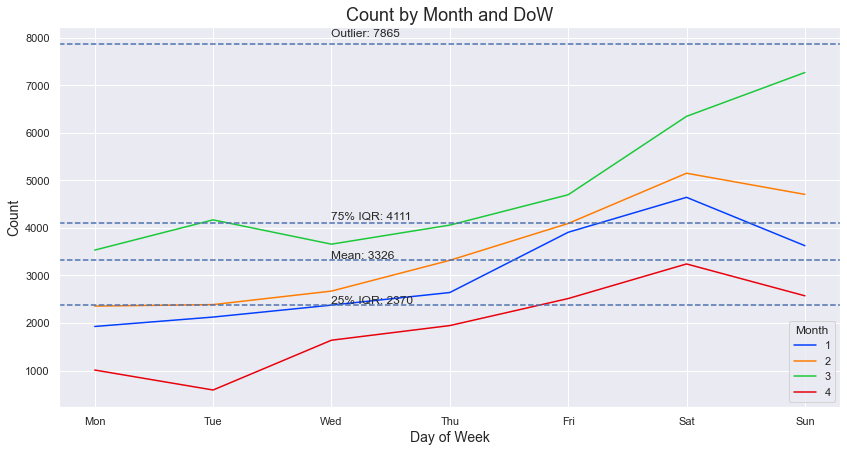

In [123]:
# Count by Month and DoW
fig, ax = plt.subplots(figsize=(14,7))
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='DoW', y='Count', data=df_MonthDow, hue='Month', palette='bright')
ax.axes.set_title("Count by Month and DoW",fontsize=18)
ax.set_xlabel("Day of Week",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_MonthDow['Count'].mean())
x = 2
std = 1513
IQRbot = 2370
IQRtop = 4111
ax.axhline(df_mean, ls='--')
ax.text(x,df_mean*1.01, "Mean: "+str(df_mean))
ax.axhline(IQRbot, ls='--') # 25%
ax.text(x,IQRbot*1.02, "25% IQR: "+str(IQRbot))
ax.axhline(IQRtop, ls='--') # 75%
ax.text(x,IQRtop*1.02, "75% IQR: "+str(IQRtop))
Outlier = int(df_mean+(3*std))
ax.axhline(Outlier, ls='--') # Outlier
ax.text(x,Outlier*1.02, "Outlier: "+str(Outlier))
print('std:', std)
print('No outliers')

Only March has more counts on Sundays than on Saturday.

std: 560
No outliers


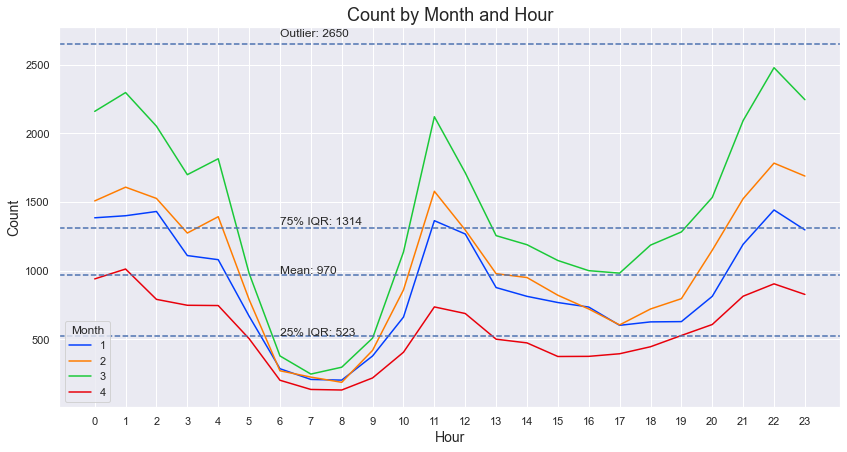

In [122]:
# Count by Month and Hour
fig, ax = plt.subplots(figsize=(14,7))
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='Hour', y='Count', data=df_MonthHour, hue='Month', palette='bright')
ax.axes.set_title("Count by Month and Hour",fontsize=18)
ax.set_xlabel("Hour",fontsize=14)
ax.set(xticks=[i for i in range(24)])
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_MonthHour['Count'].mean())
x = 6
std = 560
IQRbot = 523
IQRtop = 1314
ax.axhline(df_mean, ls='--')
ax.text(x,df_mean*1.01, "Mean: "+str(df_mean))
ax.axhline(IQRbot, ls='--') # 25%
ax.text(x,IQRbot*1.02, "25% IQR: "+str(IQRbot))
ax.axhline(IQRtop, ls='--') # 75%
ax.text(x,IQRtop*1.02, "75% IQR: "+str(IQRtop))
Outlier = int(df_mean+(3*std))
ax.axhline(Outlier, ls='--') # Outlier
ax.text(x,Outlier*1.02, "Outlier: "+str(Outlier))
print('std:', std)
print('No outliers')

Most of hourly counts in March are well above the 75% IQR.

In [107]:
df_DowHour.describe()

Hour     Count
count 168.0000  168.0000
mean   11.5000  554.4167
std     6.9429  396.5353
min     0.0000   46.0000
25%     5.7500  245.0000
50%    11.5000  494.0000
75%    17.2500  743.7500
max    23.0000 2107.0000

std: 396.5353


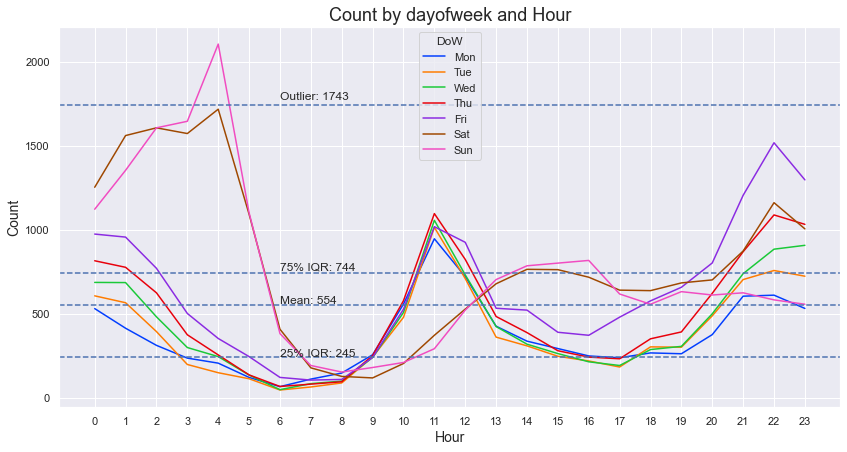

In [124]:
# Count by Dow and Hour
fig, ax = plt.subplots(figsize=(14,7))
sns.set_theme(style="darkgrid")
ax = sns.lineplot(x='Hour', y='Count', data=df_DowHour, hue='DoW', palette='bright')
ax.axes.set_title("Count by dayofweek and Hour",fontsize=18)
ax.set_xlabel("Hour",fontsize=14)
ax.set(xticks=[i for i in range(24)])
ax.set_ylabel("Count",fontsize=14)
df_mean = int(df_DowHour['Count'].mean())
std = 396.5353
x = 6
IQRbot = 245
IQRtop = 744
ax.axhline(df_mean, ls='--')
ax.text(x,df_mean*1.01, "Mean: "+str(df_mean))
ax.axhline(IQRbot, ls='--') # 25%
ax.text(x,IQRbot*1.02, "25% IQR: "+str(IQRbot))
ax.axhline(IQRtop, ls='--') # 75%
ax.text(x,IQRtop*1.02, "75% IQR: "+str(IQRtop))
Outlier = int(df_mean+(3*std))
Outlier = int(df_mean+(3*std))
ax.axhline(Outlier, ls='--') # Outlier
ax.text(x,Outlier*1.02, "Outlier: "+str(Outlier))
print('std:', std)

On Saturday and Sunday, the trend is very different, where the count rises rapidly from midnight to 5AM (4:59AM). And this is the only plot that had an outlier of 3 times more than std + mean. which is Sunday's 4AM.